# EDA Case Study

## Application data and Previous Application data

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [126]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 5242-93A4

 Directory of C:\Users\HP\Desktop\Data Science with ML and DL(Summer Training)

11-06-2024  12:24 PM    <DIR>          .
03-06-2024  10:53 AM    <DIR>          ..
11-06-2024  10:22 AM    <DIR>          .ipynb_checkpoints
10-06-2024  02:22 PM       166,133,370 application_data.csv
08-06-2024  04:35 PM             3,676 Assignment(replaceEnding, mergesort).ipynb
08-06-2024  01:57 PM           864,697 Crypto data analysis.ipynb
07-06-2024  09:45 PM    <DIR>          crypto_data
07-06-2024  09:20 PM           168,094 crypto_data.zip
04-06-2024  10:04 AM            21,872 Day1.ipynb
05-06-2024  09:44 AM            34,798 Day2.ipynb
06-06-2024  04:47 PM           580,004 Day3.1.ipynb
07-06-2024  09:58 AM           607,780 Day3.2-4.ipynb
08-06-2024  12:47 PM            84,257 Day4.2.ipynb
06-06-2024  04:47 PM           283,712 Day4.ipynb
07-06-2024  02:50 PM            42,211 Day5.1.ipynb
08-06-2024  01:05 PM             5,0

In [127]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas._config.config:

<pandas._config.config.CallableDynamicDoc object>
    set_option(pat, value)
    
    Sets the value of the specified option.
    
    Available options:
    
    - compute.[use_bottleneck, use_numba, use_numexpr]
    - display.[chop_threshold, colheader_justify, date_dayfirst, date_yearfirst,
      encoding, expand_frame_repr, float_format]
    - display.html.[border, table_schema, use_mathjax]
    - display.[large_repr, max_categories, max_columns, max_colwidth, max_dir_items,
      max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
      min_rows, multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
      show_dimensions]
    - display.unicode.[ambiguous_as_wide, east_asian_width]
    - display.[width]
    - io.excel.ods.[reader, writer]
    - io.excel.xls.[reader]
    - io.excel.xlsb.[reader]
    - io.excel.xlsm.[reader, writer]
    - io.excel.xlsx.[reader, writer]
    - io.hdf.[default_for

In [128]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [129]:
appd_df=pd.read_csv("application_data.csv")

In [130]:
appd_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [131]:
print("appd_df.shape=",appd_df.shape)

appd_df.shape= (307511, 122)


In [132]:
list(appd_df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [133]:
pappd_df=pd.read_csv("previous_application.csv")

In [134]:
pappd_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
print("pappd_df.shape=",pappd_df.shape)

pappd_df.shape= (1670214, 37)


In [136]:
list(pappd_df.columns)

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [137]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\Data Science with ML and DL(Summer Training)'

In [138]:
os.listdir()

['.ipynb_checkpoints',
 'application_data.csv',
 'Assignment(replaceEnding, mergesort).ipynb',
 'Crypto data analysis.ipynb',
 'crypto_data',
 'crypto_data.zip',
 'Day1.ipynb',
 'Day2.ipynb',
 'Day3.1.ipynb',
 'Day3.2-4.ipynb',
 'Day4.2.ipynb',
 'Day4.ipynb',
 'Day5.1.ipynb',
 'Day5.2.ipynb',
 'Day5.ipynb',
 'Day7.1-8.ipynb',
 'Day7.ipynb',
 'Day8.ipynb',
 'download.png',
 'drive-download-20240605T064641Z-001.zip',
 'Eucledian Algorithm.ipynb',
 'Give',
 'global_sales_data',
 'Hello world.txt',
 'HR_comma_sep.csv',
 'mmd',
 'Mod_1.py',
 'nlp-chatbot-using-nltk.ipynb',
 'previous_application.csv',
 'Univariate_anal.png',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 '__pycache__']

In [139]:
null_per_appd=(round((appd_df.isnull().sum().T/len(appd_df)*100).sort_values(ascending=False),2))

In [140]:
print("percentage of null in each column:",null_per_appd)

percentage of null in each column: COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_A

In [141]:
(null_per_appd>50).sum()

41

In [142]:
help(appd_df.isnull().sum().T)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool' = False) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contain

In [143]:
type(appd_df.isnull().sum())

pandas.core.series.Series

In [144]:
null_per_appd.head(41).index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')

In [145]:
help(appd_df.head(4).index)

Help on RangeIndex in module pandas.core.indexes.range object:

class RangeIndex(pandas.core.indexes.base.Index)
 |  RangeIndex(start=None, stop=None, step=None, dtype: 'Dtype | None' = None, copy: 'bool' = False, name: 'Hashable' = None) -> 'RangeIndex'
 |  
 |  Immutable Index implementing a monotonic integer range.
 |  
 |  RangeIndex is a memory-saving special case of an Index limited to representing
 |  monotonic ranges with a 64-bit dtype. Using RangeIndex may in some instances
 |  improve computing speed.
 |  
 |  This is the default index type used
 |  by DataFrame and Series when no explicit index is provided by the user.
 |  
 |  Parameters
 |  ----------
 |  start : int (default: 0), range, or other RangeIndex instance
 |      If int and "stop" is not given, interpreted as "stop" instead.
 |  stop : int (default: 0)
 |  step : int (default: 1)
 |  dtype : np.int64
 |      Unused, accepted for homogeneity with other index types.
 |  copy : bool, default False
 |      Unused, 

In [146]:
help(null_per_appd.head(16).index)

Help on Index in module pandas.core.indexes.base object:

class Index(pandas.core.base.IndexOpsMixin, pandas.core.base.PandasObject)
 |  Index(data=None, dtype=None, copy: 'bool' = False, name=None, tupleize_cols: 'bool' = True) -> 'Index'
 |  
 |  Immutable sequence used for indexing and alignment.
 |  
 |  The basic object storing axis labels for all pandas objects.
 |  
 |  .. versionchanged:: 2.0.0
 |  
 |     Index can hold all numpy numeric dtypes (except float16). Previously only
 |     int64/uint64/float64 dtypes were accepted.
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : NumPy dtype (default: object)
 |      If dtype is None, we find the dtype that best fits the data.
 |      If an actual dtype is provided, we coerce to that dtype if it's safe.
 |      Otherwise, an error will be raised.
 |  copy : bool
 |      Make a copy of input ndarray.
 |  name : object
 |      Name to be stored in the index.
 |  tupleize_cols : bool (default: True)

In [147]:
print("appd_df.shape=",appd_df.shape)

appd_df.shape= (307511, 122)


In [148]:
appd_df.drop(null_per_appd.head(41).index,axis=1,inplace=True)

In [149]:
print("appd_df.shape=",appd_df.shape)

appd_df.shape= (307511, 81)


In [150]:
appd_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
appd_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [152]:
appd_df.dtypes.value_counts()

int64      41
float64    27
object     13
Name: count, dtype: int64

In [153]:
appd_df["SK_ID_CURR"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: SK_ID_CURR
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


In [154]:
appd_df["SK_ID_CURR"]=appd_df["SK_ID_CURR"].astype(object)

In [155]:
appd_df.dtypes

SK_ID_CURR                       object
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [156]:
appd_df["SK_ID_CURR"].dtype

dtype('O')

In [157]:
print(round((appd_df.isnull().sum().T/len(appd_df)*100).sort_values(ascending=False),2))

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
NAME_TYPE_SUITE                  0.42
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
AMT_ANNUITY                      0.00
CNT_FAM_MEMBERS                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_OWN_CAR

In [158]:
appd_df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.006402,0.007000,0.034362,0.267395,0.265474
std,1.869295,0.083849,0.110757,0.204685,0.916002,0.794056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,4.000000,9.000000,8.000000,27.000000,261.000000


In [159]:
appd_df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]].isna().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
dtype: int64

In [160]:
appd_df["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1,inplace=True)

In [161]:
appd_df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]].isna().sum()

AMT_REQ_CREDIT_BUREAU_YEAR        0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
dtype: int64

In [162]:
appd_df[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]]=appd_df[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]].fillna(0)

In [163]:
appd_df[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"]].isna().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

# Summary(7)

Here we studied about a case study using two datasets called "previous_application.csv" and "application_data.csv". Here searched for all the missing values in each columns using :

- "null_per_appd=(round((appd_df.isnull().sum().T/len(appd_df)*100).sort_values(ascending=False),2))" 

and further deleted the columns having more than 50% of empty values using :

- (null_per_appd>50).sum()
- appd_df.drop(null_per_appd.head(41).index,axis=1,inplace=True)

Then we further filled some of the columns with their median values using:

- appd_df["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1,inplace=True)
 - appd_df[["AMT_REQ_CREDIT_BUREAU_YEAR",
 "AMT_REQ_CREDIT_BUREAU_HOUR",
 "AMT_REQ_CREDIT_BUREAU_DAY",
 "AMT_REQ_CREDIT_BUREAU_WEEK",
 "AMT_REQ_CREDIT_BUREAU_MON",
 "AMT_REQ_CREDIT_BUREAU_QRT"]].isna().sum()

In [164]:
appd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00


# Data Ananlysis

### Univariate analysis, Outlier identification and Treatment


In [165]:
appd_df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511,0,0,0,0,0,0,1
CNT_CHILDREN,307511,0,0,0,0,0,1,19
AMT_INCOME_TOTAL,307511,168797,237123,25650,112500,147150,202500,117000000
AMT_CREDIT,307511,599025,402490,45000,270000,513531,808650,4050000
AMT_ANNUITY,307499,27108,14493,1615,16524,24903,34596,258025
AMT_GOODS_PRICE,307233,538396,369446,40500,238500,450000,679500,4050000
REGION_POPULATION_RELATIVE,307511,0,0,0,0,0,0,0
DAYS_BIRTH,307511,-16036,4363,-25229,-19682,-15750,-12413,-7489
DAYS_EMPLOYED,307511,63815,141275,-17912,-2760,-1213,-289,365243
DAYS_REGISTRATION,307511,-4986,3522,-24672,-7479,-4504,-2010,0


In [166]:
appd_df.shape

(307511, 81)

<Figure size 640x480 with 0 Axes>

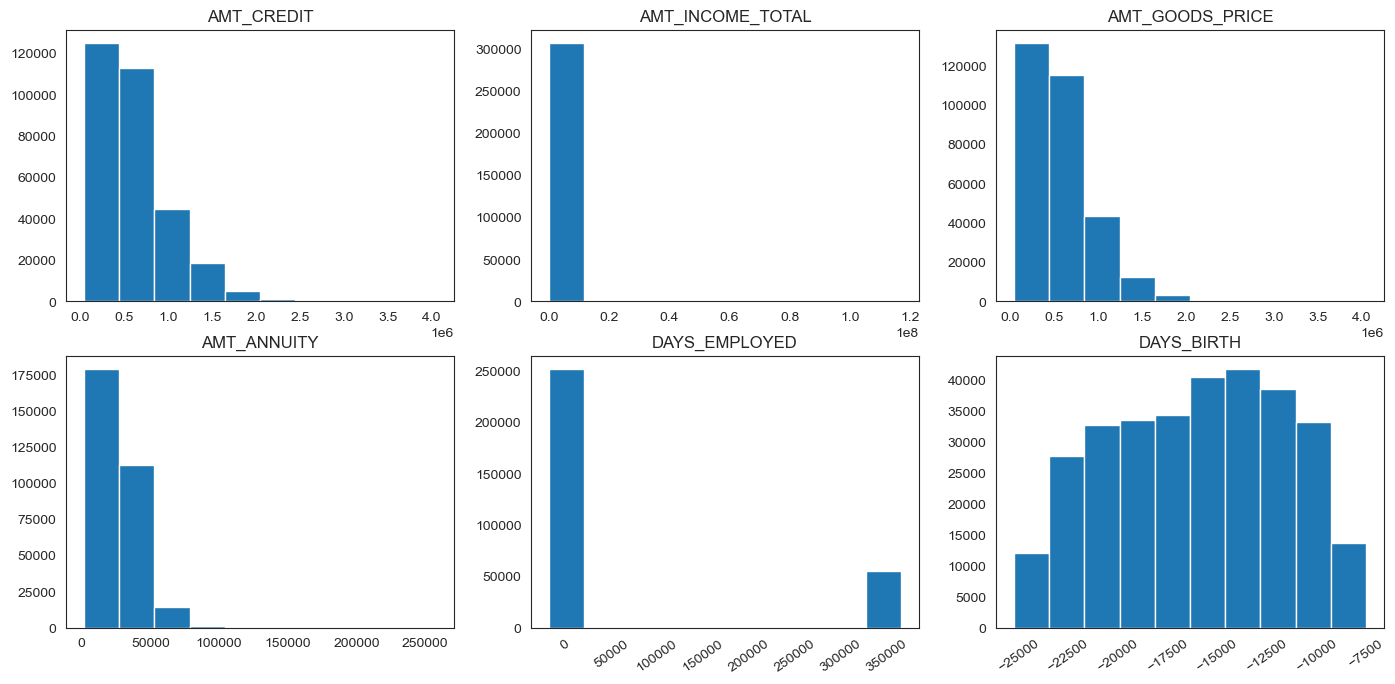

In [167]:
plt.figure(1)

plt.figure(figsize=(17,12))
plt.subplot(3,3,1)
plt.hist(appd_df.AMT_CREDIT)
plt.title("AMT_CREDIT")

plt.subplot(3,3,2)
plt.hist(appd_df.AMT_INCOME_TOTAL)
plt.title("AMT_INCOME_TOTAL")

plt.subplot(3,3,3)
plt.hist(appd_df.AMT_GOODS_PRICE)
plt.title("AMT_GOODS_PRICE")

plt.subplot(3,3,4)
plt.hist(appd_df.AMT_ANNUITY)
plt.title("AMT_ANNUITY")

plt.subplot(3,3,5)
plt.hist(appd_df.DAYS_EMPLOYED)
plt.title("DAYS_EMPLOYED")
plt.xticks(rotation=35)

plt.subplot(3,3,6)
plt.hist(appd_df.DAYS_BIRTH)
plt.title("DAYS_BIRTH")
plt.xticks(rotation=35)


plt.savefig("Univariate_anal.png")

<Axes: xlabel='DAYS_BIRTH'>

<Figure size 640x480 with 0 Axes>

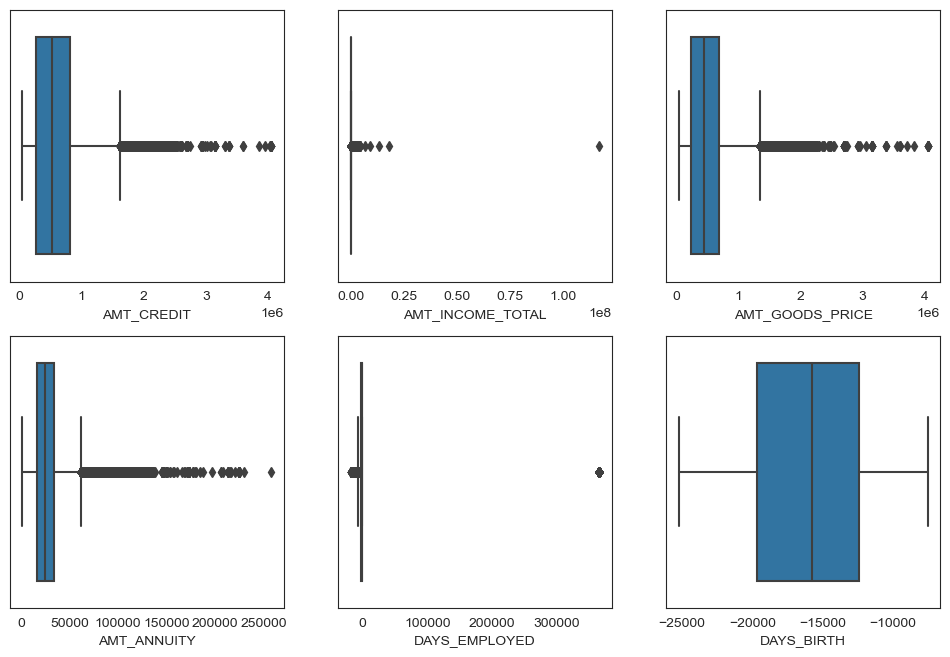

In [168]:
plt.figure(1)
sns.set_style("white")
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.boxplot(x=appd_df.AMT_CREDIT)
plt.subplot(3,3,2)
sns.boxplot(x=appd_df.AMT_INCOME_TOTAL)

plt.subplot(3,3,3)
sns.boxplot(x=appd_df.AMT_GOODS_PRICE)

plt.subplot(3,3,4)
sns.boxplot(x=appd_df.AMT_ANNUITY)

plt.subplot(3,3,5)

sns.boxplot(x=appd_df.DAYS_EMPLOYED)

plt.subplot(3,3,6)
sns.boxplot(x=appd_df.DAYS_BIRTH)




In [169]:
appd_df.DAYS_EMPLOYED.quantile([0,.1,.25,.5,.75,.81,.819926,.82,.9,.99,.91,1])

0.000000    -17912.0
0.100000     -4881.0
0.250000     -2760.0
0.500000     -1213.0
0.750000      -289.0
0.810000      -116.0
0.819926         0.0
0.820000    365243.0
0.900000    365243.0
0.990000    365243.0
0.910000    365243.0
1.000000    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [170]:
help(appd_df.DAYS_EMPLOYED.quantile)

Help on method quantile in module pandas.core.series:

quantile(q: 'float | Sequence[float] | AnyArrayLike' = 0.5, interpolation: 'QuantileInterpolation' = 'linear') -> 'float | Series' method of pandas.core.series.Series instance
    Return value at the given quantile.
    
    Parameters
    ----------
    q : float or array-like, default 0.5 (50% quantile)
        The quantile(s) to compute, which can lie in range: 0 <= q <= 1.
    interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
        This optional parameter specifies the interpolation method to use,
        when the desired quantile lies between two data points `i` and `j`:
    
            * linear: `i + (j - i) * fraction`, where `fraction` is the
              fractional part of the index surrounded by `i` and `j`.
            * lower: `i`.
            * higher: `j`.
            * nearest: `i` or `j` whichever is nearest.
            * midpoint: (`i` + `j`) / 2.
    
    Returns
    -------
    float or Se

In [171]:
appd_df.DAYS_EMPLOYED.loc[appd_df.DAYS_EMPLOYED==365243]=-2384.0

C:\Users\HP\AppData\Local\Temp\ipykernel_8388\233267256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appd_df.DAYS_EMPLOYED.loc[appd_df.DAYS_EMPLOYED==365243]=-2384.0


In [172]:
appd_df.DAYS_EMPLOYED.loc[appd_df.DAYS_EMPLOYED==365243].count()

0

In [173]:
appd_df.DAYS_EMPLOYED.loc[appd_df.DAYS_EMPLOYED<365243].mean()

-2384.138834057969

In [174]:
appd_df.DAYS_EMPLOYED.quantile([0,.1,.25,.5,.75,.81,.819926,.82,.9,.99,.91,1])

0.000000   -17912.0
0.100000    -4881.0
0.250000    -2760.0
0.500000    -2219.0
0.750000     -933.0
0.810000     -714.0
0.819926     -678.0
0.820000     -678.0
0.900000     -392.0
0.990000     -116.0
0.910000     -361.0
1.000000        0.0
Name: DAYS_EMPLOYED, dtype: float64

In [175]:
appd_df.AMT_INCOME_TOTAL.quantile([0,.1,.25,.5,.75,.81,.82,.9,.999,.91,1])

0.000        25650.0
0.100        81000.0
0.250       112500.0
0.500       147150.0
0.750       202500.0
0.810       225000.0
0.820       225000.0
0.900       270000.0
0.999       900000.0
0.910       270000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [180]:
(appd_df.AMT_INCOME_TOTAL.loc[appd_df.AMT_INCOME_TOTAL>900000]/100000).describe()

count     278.000000
mean       20.355437
std        70.765014
min         9.004500
25%        11.250000
50%        13.500000
75%        15.750000
max      1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [186]:
appd_df.loc[appd_df.AMT_INCOME_TOTAL<117000000,"AMT_INCOME_TOTAL"].mean()

168417.9927837866

In [187]:
appd_df.loc[appd_df.AMT_INCOME_TOTAL==117000000,"AMT_INCOME_TOTAL"]=168418

In [188]:
appd_df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511,0,0,0,0,0,0,1
CNT_CHILDREN,307511,0,0,0,0,0,1,19
AMT_INCOME_TOTAL,307511,168417,108811,25650,112500,147150,202500,18000090
AMT_CREDIT,307511,599025,402490,45000,270000,513531,808650,4050000
AMT_ANNUITY,307499,27108,14493,1615,16524,24903,34596,258025
AMT_GOODS_PRICE,307233,538396,369446,40500,238500,450000,679500,4050000
REGION_POPULATION_RELATIVE,307511,0,0,0,0,0,0,0
DAYS_BIRTH,307511,-16036,4363,-25229,-19682,-15750,-12413,-7489
DAYS_EMPLOYED,307511,-2384,2117,-17912,-2760,-2219,-933,0
DAYS_REGISTRATION,307511,-4986,3522,-24672,-7479,-4504,-2010,0


In [189]:
appd_df.loc[appd_df.AMT_INCOME_TOTAL>202500,"AMT_INCOME_TOTAL"].count()

71537

<Axes: xlabel='AMT_INCOME_TOTAL'>

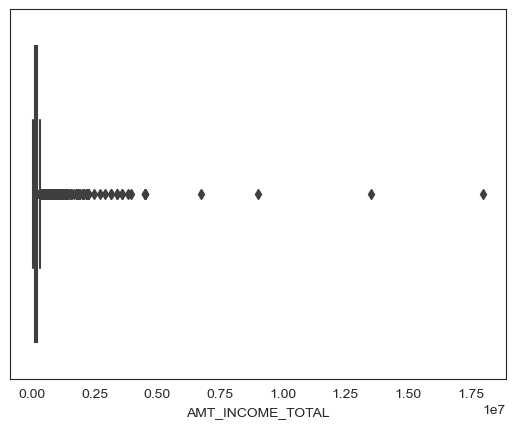

In [185]:
sns.boxplot(x=appd_df.AMT_INCOME_TOTAL)

<Axes: xlabel='DAYS_BIRTH'>

<Figure size 640x480 with 0 Axes>

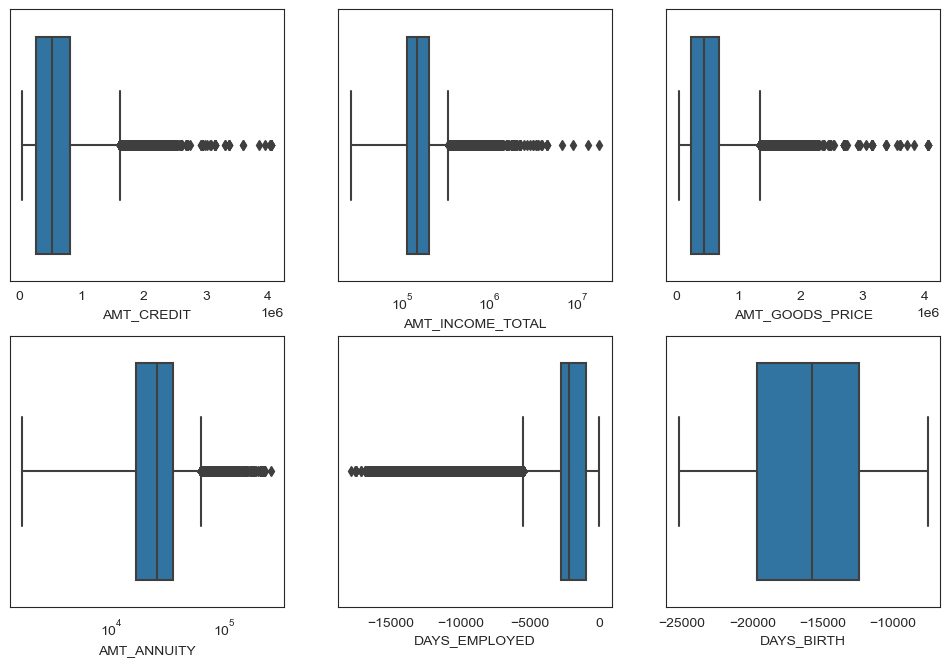

In [195]:
plt.figure(1)
sns.set_style("white")
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.boxplot(x=appd_df.AMT_CREDIT)
plt.subplot(3,3,2)
plt.xscale("log")
plt.xscale("log")

sns.boxplot(x=appd_df.AMT_INCOME_TOTAL)

plt.subplot(3,3,3)
sns.boxplot(x=appd_df.AMT_GOODS_PRICE)

plt.subplot(3,3,4)
plt.xscale("log")

sns.boxplot(x=appd_df.AMT_ANNUITY)

plt.subplot(3,3,5)

sns.boxplot(x=appd_df.DAYS_EMPLOYED)

plt.subplot(3,3,6)
sns.boxplot(x=appd_df.DAYS_BIRTH)




In [196]:
appd_df["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [204]:
appd_df.groupby("AMT_REQ_CREDIT_BUREAU_QRT")["SK_ID_CURR"].count()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: SK_ID_CURR, dtype: int64

In [205]:
appd_df["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [206]:
appd_df["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [207]:
def calAge(days):
    days_in_year=365.2425
    return int(abs(days/days_in_year))

appd_df["Age"]=appd_df["DAYS_BIRTH"].apply(calAge)

In [208]:
appd_df["Age"].describe()

count    307511.000000
mean         43.405442
std          11.945936
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

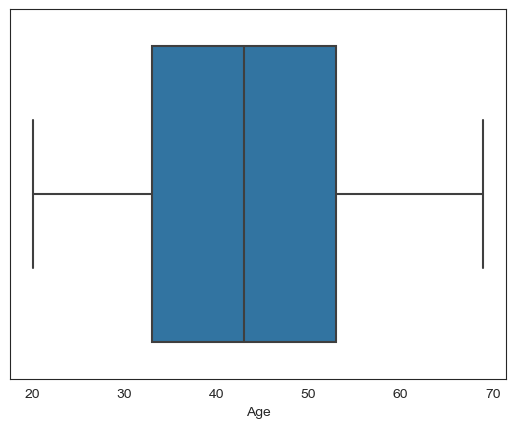

In [209]:
sns.boxplot(x=appd_df.Age)


Text(0.5, 1.0, 'Distribyution of age groups in the application data set')

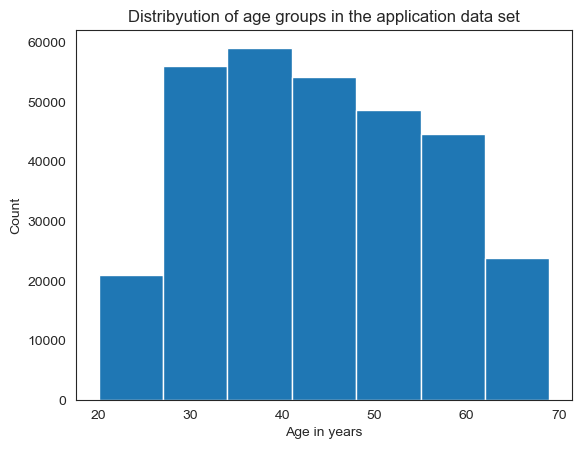

In [210]:
plt.hist(appd_df["Age"],bins=7)
plt.xlabel("Age in years")
plt.ylabel("Count")
plt.title("Distribyution of age groups in the application data set")


In [211]:
interval=(18,25,35,60,120)
cats=["Student","Young","Adult","Senior"]

In [213]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: 'bool' = True, labels=None, retbins: 'bool' = False, precision: 'int' = 3, include_lowest: 'bool' = False, duplicates: 'str' = 'raise', ordered: 'bool' = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values 

In [214]:
appd_df["Age_cat"]=pd.cut(appd_df.Age,interval,labels=cats)

In [216]:
appd_df["Age_cat"].unique()

['Student', 'Adult', 'Young', 'Senior']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']

In [218]:
(appd_df["Age_cat"].value_counts()/len(appd_df.Age_cat))*100

Age_cat
Adult      60.472633
Young      24.716839
Senior      9.474458
Student     5.336069
Name: count, dtype: float64

<Axes: ylabel='count'>

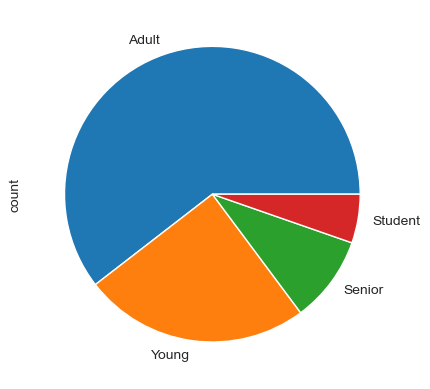

In [220]:
((appd_df["Age_cat"].value_counts()/len(appd_df.Age_cat))*100).plot.pie()

In [230]:
appd_df.select_dtypes("object").apply(pd.Series.nunique,axis=0).sort_values(ascending=False)

SK_ID_CURR                    307511
ORGANIZATION_TYPE                 58
OCCUPATION_TYPE                   18
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
NAME_EDUCATION_TYPE                5
CODE_GENDER                        3
NAME_CONTRACT_TYPE                 2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
EMERGENCYSTATE_MODE                2
dtype: int64

In [223]:
appd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  object  
 1   TARGET                        307511 non-null  int64   
 2   NAME_CONTRACT_TYPE            307511 non-null  object  
 3   CODE_GENDER                   307511 non-null  object  
 4   FLAG_OWN_CAR                  307511 non-null  object  
 5   FLAG_OWN_REALTY               307511 non-null  object  
 6   CNT_CHILDREN                  307511 non-null  int64   
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  object  
 12  NAME_INCOME_TYPE              

In [228]:
appd_df["ORGANIZATION_TYPE"].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

# Data imbalance

#### Dividing the data into two sets based on target 1 and 0
- target 1 means there is difficulty to pay the loan
- target 0 means there is npo difficulty to pay the loan

In [234]:
print("Plotting the distributipono of target 1 vs target 0 from the data frame to understand if any imbalances are present")
print(round(appd_df.TARGET.astype("object").value_counts().sort_values(ascending=True)/len(appd_df)*100),2)

Plotting the distributipono of target 1 vs target 0 from the data frame to understand if any imbalances are present
TARGET
1     8.0
0    92.0
Name: count, dtype: float64 2


In [235]:
appd_df["OCCUPATION_TYPE"].value_counts().sort_values(ascending=False)

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [236]:
round(appd_df["CODE_GENDER"].value_counts()/len(appd_df["CODE_GENDER"])*100,2)

CODE_GENDER
F      65.83
M      34.16
XNA     0.00
Name: count, dtype: float64

In [237]:
appd_df["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [240]:
appd_df_0=appd_df.loc[appd_df.TARGET==0]
appd_df_1=appd_df.loc[appd_df.TARGET==1]

In [241]:
appd_df_0.shape

(282686, 83)

In [242]:
appd_df_1.shape

(24825, 83)

<Figure size 640x480 with 0 Axes>

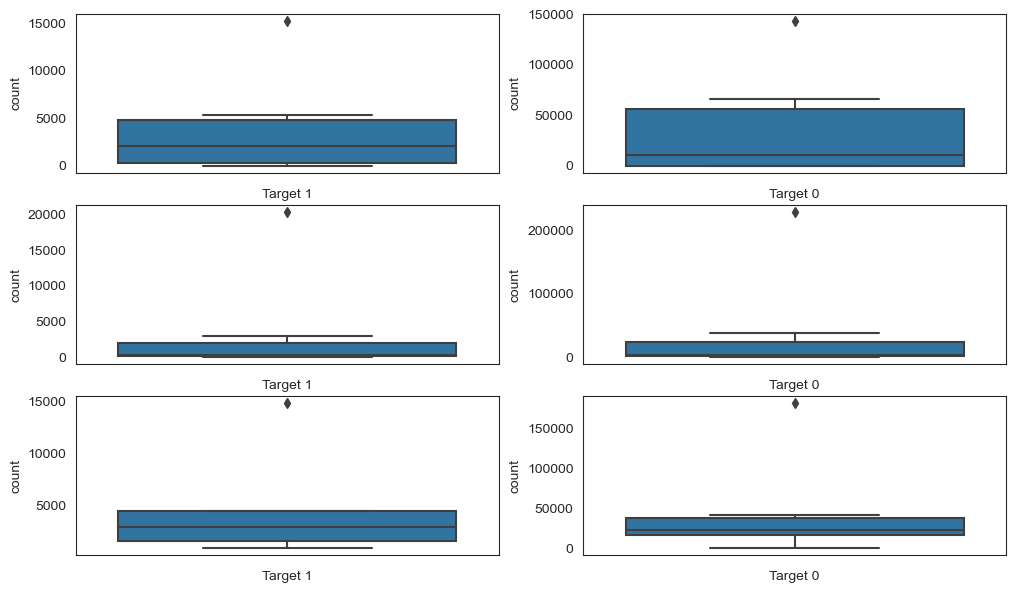

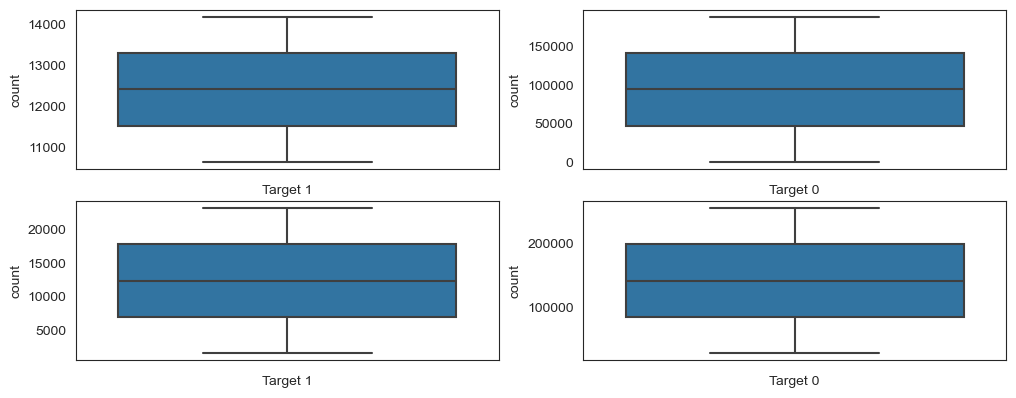

In [252]:
plt.figure(1)
sns.set_style("white")
plt.figure(figsize=(12,12))
plt.subplot(5,2,1)
sns.boxplot(y=appd_df_1.NAME_INCOME_TYPE.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,2)
sns.boxplot(y=appd_df_0.NAME_INCOME_TYPE.value_counts())
plt.xlabel("Target 0")

plt.subplot(5,2,3)
sns.boxplot(y=appd_df_1.NAME_TYPE_SUITE.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,4)
sns.boxplot(y=appd_df_0.NAME_TYPE_SUITE.value_counts())
plt.xlabel("Target 0")

plt.subplot(5,2,5)
sns.boxplot(y=appd_df_1.NAME_FAMILY_STATUS.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,6)
sns.boxplot(y=appd_df_0.NAME_FAMILY_STATUS.value_counts())
plt.xlabel("Target 0")


plt.figure(2)
sns.set_style("white")
plt.figure(figsize=(12,12))
plt.subplot(5,2,1)
sns.boxplot(y=appd_df_1.CODE_GENDER.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,2)
sns.boxplot(y=appd_df_0.CODE_GENDER.value_counts())
plt.xlabel("Target 0")

plt.subplot(5,2,3)
sns.boxplot(y=appd_df_1.NAME_CONTRACT_TYPE.value_counts())
plt.xlabel("Target 1")

plt.subplot(5,2,4)
sns.boxplot(y=appd_df_0.NAME_CONTRACT_TYPE.value_counts())
plt.xlabel("Target 0")

plt.savefig("univariate analysis-boxplot.png")


Text(0.5, 1.0, 'NAME_TYPE_SUITE')

<Figure size 640x480 with 0 Axes>

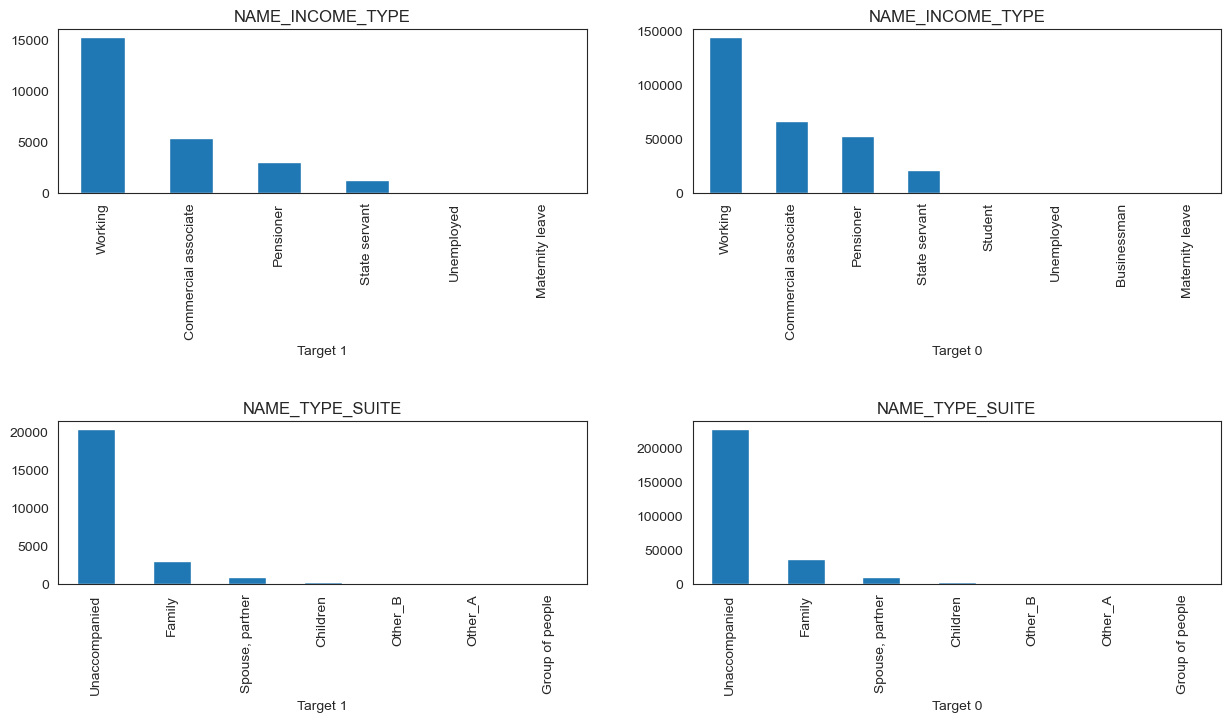

In [253]:


plt.savefig("univariate analysis- Income type ")

<Figure size 640x480 with 0 Axes>

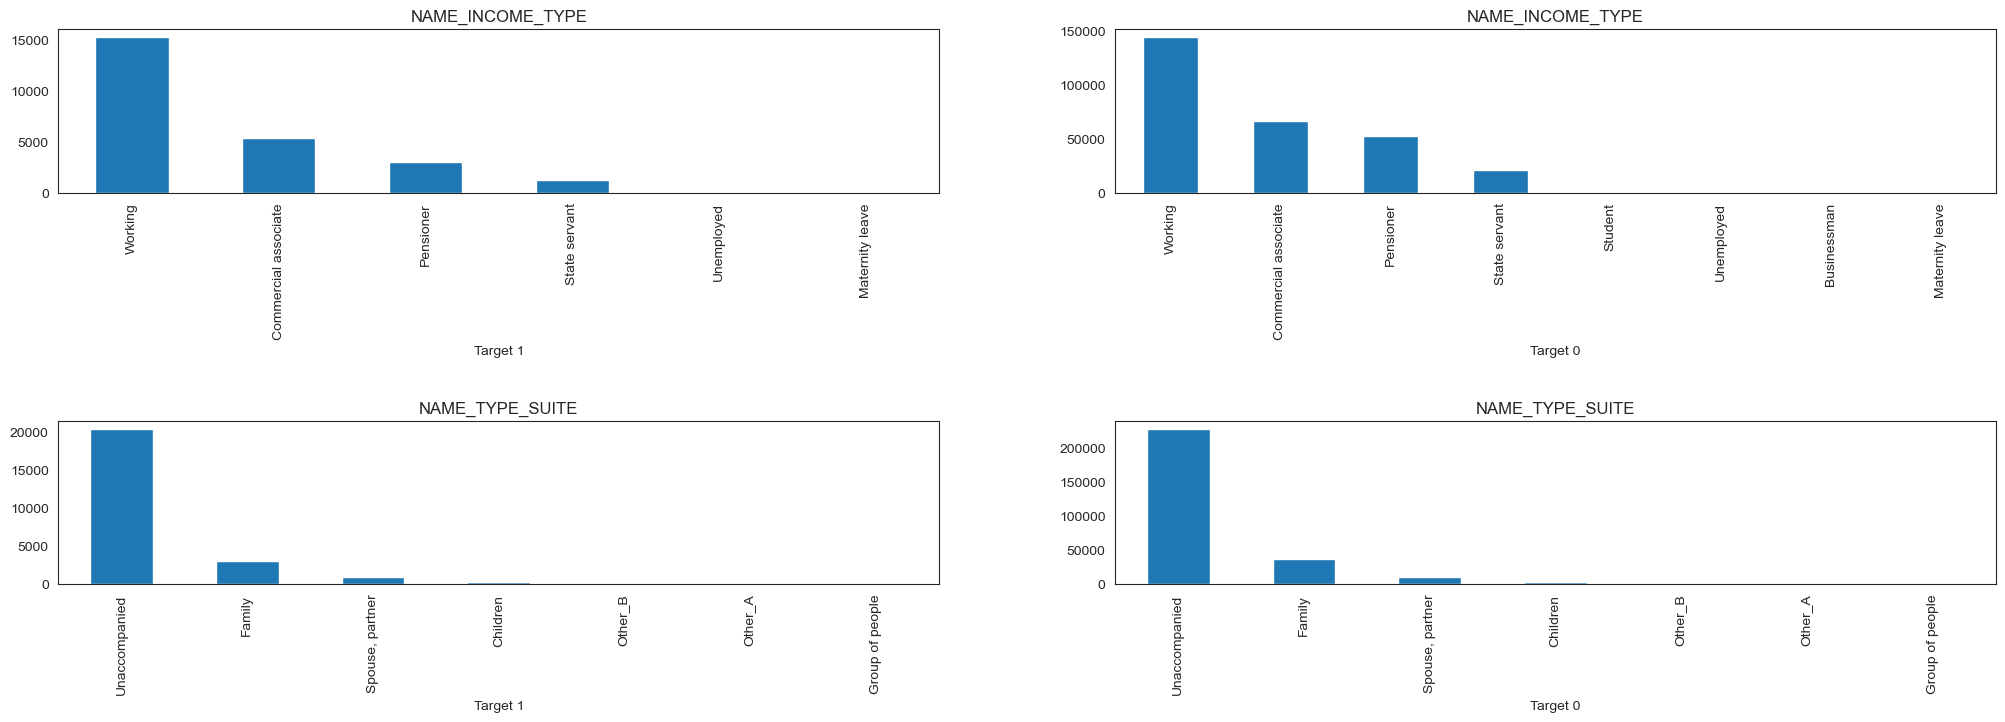

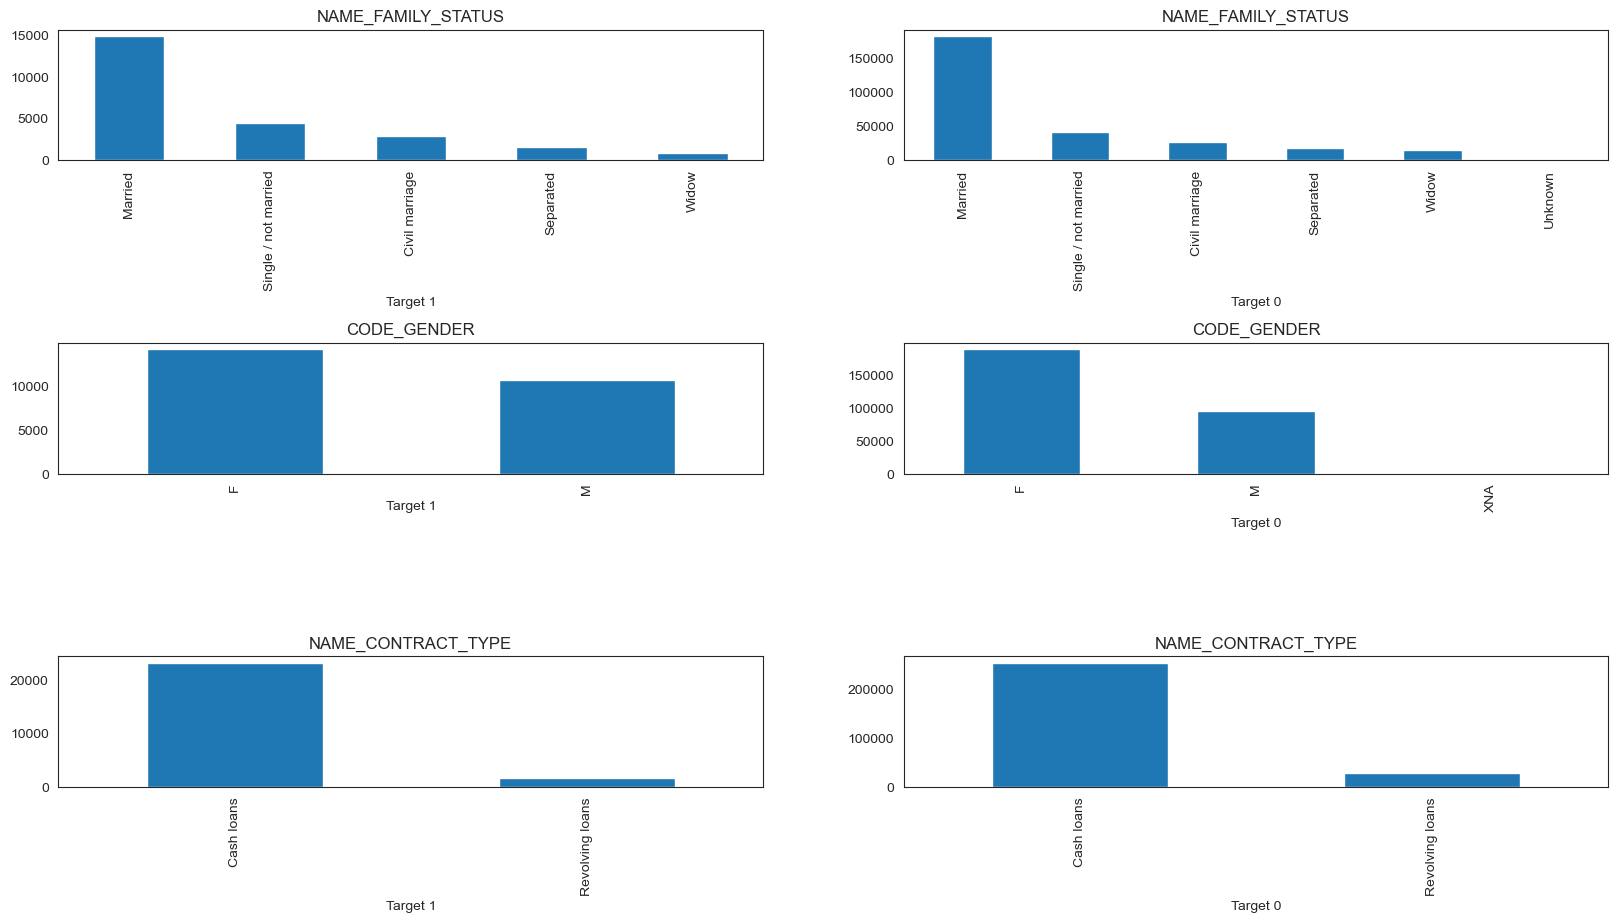

In [259]:
plt.figure(1)
sns.set_style("white")
plt.figure(figsize=(25,25))
plt.subplot(10,2,1)
appd_df_1.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xlabel("Target 1")
plt.title("NAME_INCOME_TYPE")
plt.subplot(10,2,2)
appd_df_0.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.xlabel("Target 0")
plt.title("NAME_INCOME_TYPE")

plt.subplot(10,2,5)
appd_df_1.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.xlabel("Target 1")
plt.title("NAME_TYPE_SUITE")

plt.subplot(10,2,6)
appd_df_0.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.xlabel("Target 0")
plt.title("NAME_TYPE_SUITE")


plt.figure(2)
sns.set_style("white")
plt.figure(figsize=(20,20))
plt.subplot(10,2,1)
appd_df_1.NAME_FAMILY_STATUS.value_counts().plot.bar()
plt.xlabel("Target 1")
plt.title("NAME_FAMILY_STATUS")
plt.subplot(10,2,2)
appd_df_0.NAME_FAMILY_STATUS.value_counts().plot.bar()
plt.xlabel("Target 0")
plt.title("NAME_FAMILY_STATUS")

plt.subplot(10,2,5)
appd_df_1.CODE_GENDER.value_counts().plot.bar()
plt.xlabel("Target 1")
plt.title("CODE_GENDER")

plt.subplot(10,2,6)
appd_df_0.CODE_GENDER.value_counts().plot.bar()
plt.xlabel("Target 0")
plt.title("CODE_GENDER")


plt.subplot(10,2,9)
appd_df_1.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.xlabel("Target 1")
plt.title("NAME_CONTRACT_TYPE")

plt.subplot(10,2,10)
appd_df_0.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.xlabel("Target 0")
plt.title("NAME_CONTRACT_TYPE")

plt.savefig("univariate analysis- target 1 vs 0 part 2 ")

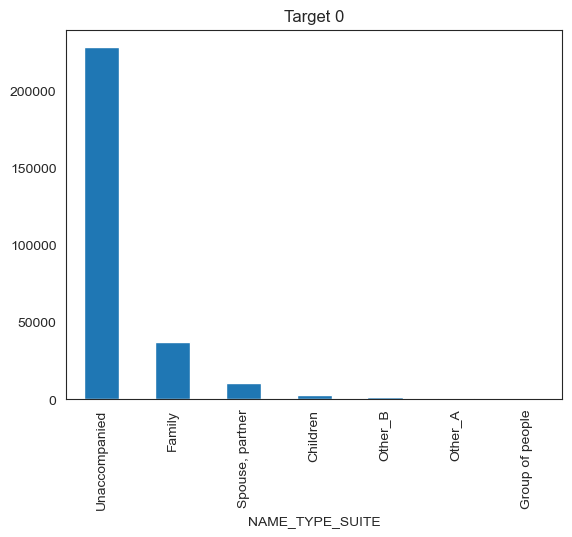

Text(0.5, 1.0, 'Target 1')

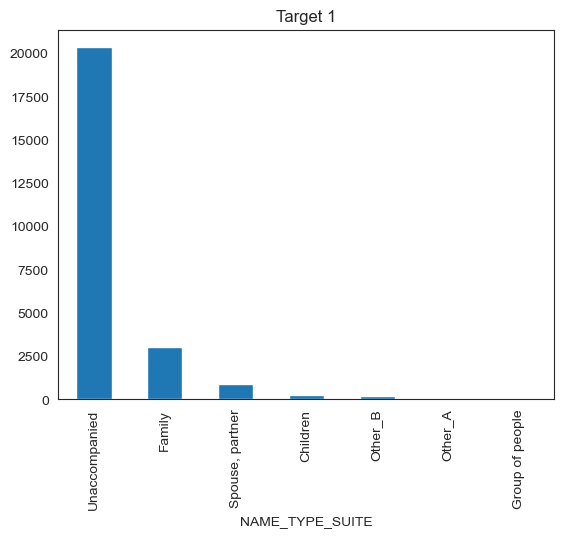

In [262]:
appd_df_0.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.title("Target 0")
plt.show()

appd_df_1.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.title("Target 1")

<Axes: ylabel='OCCUPATION_TYPE'>

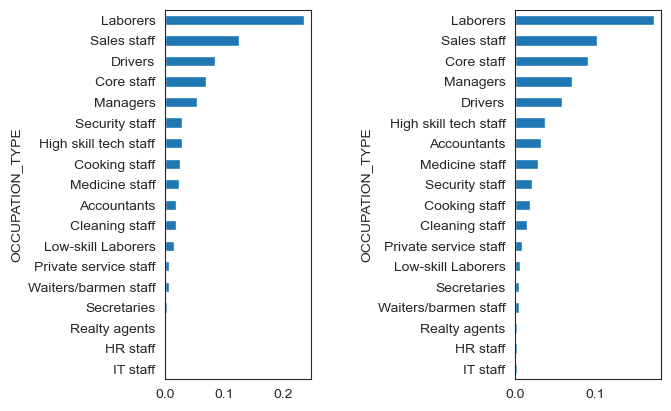

In [267]:
plt.figure(1)
plt.subplot(1,3,1)
(appd_df_1.OCCUPATION_TYPE.value_counts()/len(appd_df_1.OCCUPATION_TYPE)).sort_values(ascending=True).plot.barh()

plt.subplot(1,3,3)
(appd_df_0.OCCUPATION_TYPE.value_counts()/len(appd_df_0.OCCUPATION_TYPE)).sort_values(ascending=True).plot.barh()

In [268]:
corr_0=appd_df_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","Age"]].corr()
corr_1=appd_df_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","Age"]].corr()

<Axes: title={'center': 'Target 1'}>

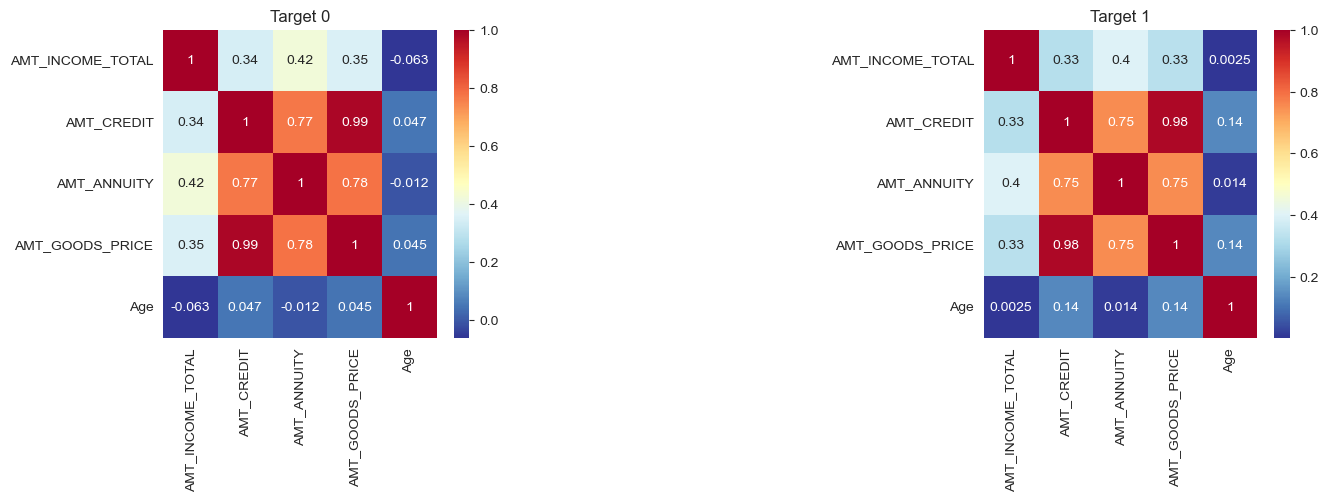

In [269]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title("Target 0")
sns.heatmap(corr_0,cmap=plt.cm.RdYlBu_r,annot=True)

plt.subplot(1,3,3)
plt.title("Target 1")
sns.heatmap(corr_1,cmap=plt.cm.RdYlBu_r,annot=True)


# Summary(8)

Today, we continued the previous analysis of "application_data.csv".
We did the following activities:
- Univariate analysis
- Outlier Identification
- and Outlier treatment

we first plotted barplot and boxplot for the value of the following attributes:

- DAYS_BIRTH
- DAYS_EMPLOYED
- AMT_ANNUITY
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL
- AMT_CREDIT

We found outliers in DAYS_EMPLOYED and AMT_INCOME_TOTAL. and replaced them with the mean values of the columns.

Then we added new column called Age from the existing column DAYS_BIRTH and categorized all entries into the following categories according to their age:
- Student
- Young
- Adult
- Senior

Then we studied about data imbalance by taking 2 groups into consideration:
- Target 1 means there is difficulty to pay the loan
- Target 0 means there is no difficulty to pay the loan


And then compared their following attributes by using Boxplot and bar plot:
- NAME_INCOME_TYPE
- NAME_TYPE_SUITE
- NAME_FAMILY_STATUS
- CODE_GENDER
- NAME_CONTRACT_TYPE

and found the correlation matrix of the categories using the following attributes:

"AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","Age"